# Twitter Entity Sentiment Analysis

### This notebook analyzes and visualizes sentiment patterns in tweets to understand public opinion and attitudes towards specific topics or brands.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\narmadha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\narmadha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [149]:
# Load dataset (replace with your file path if different)
df = pd.read_csv("C:/Users/narmadha/Downloads/archive (3)/twitter_training.csv" ,header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()
     


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [151]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|@\w+|#\w+|[^A-Za-z0-9 ]", '', str(text))
    words = text.lower().split()
    return ' '.join([w for w in words if w not in stop_words])

df['clean_tweet'] = df['Tweet'].apply(clean_text)
df[['Tweet', 'clean_tweet']].head()

,Tweet,clean_tweet
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder


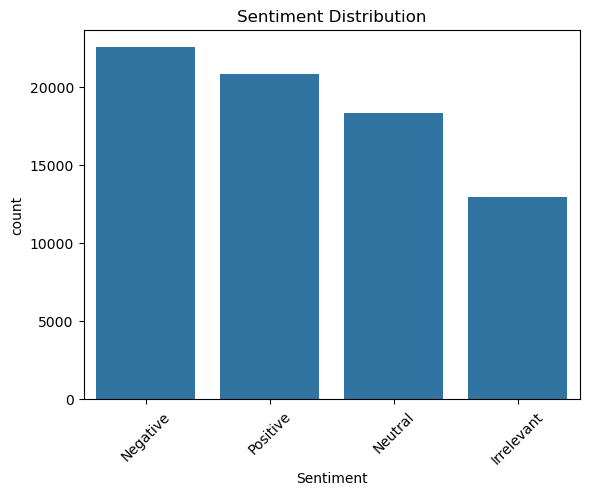

In [153]:
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()
     

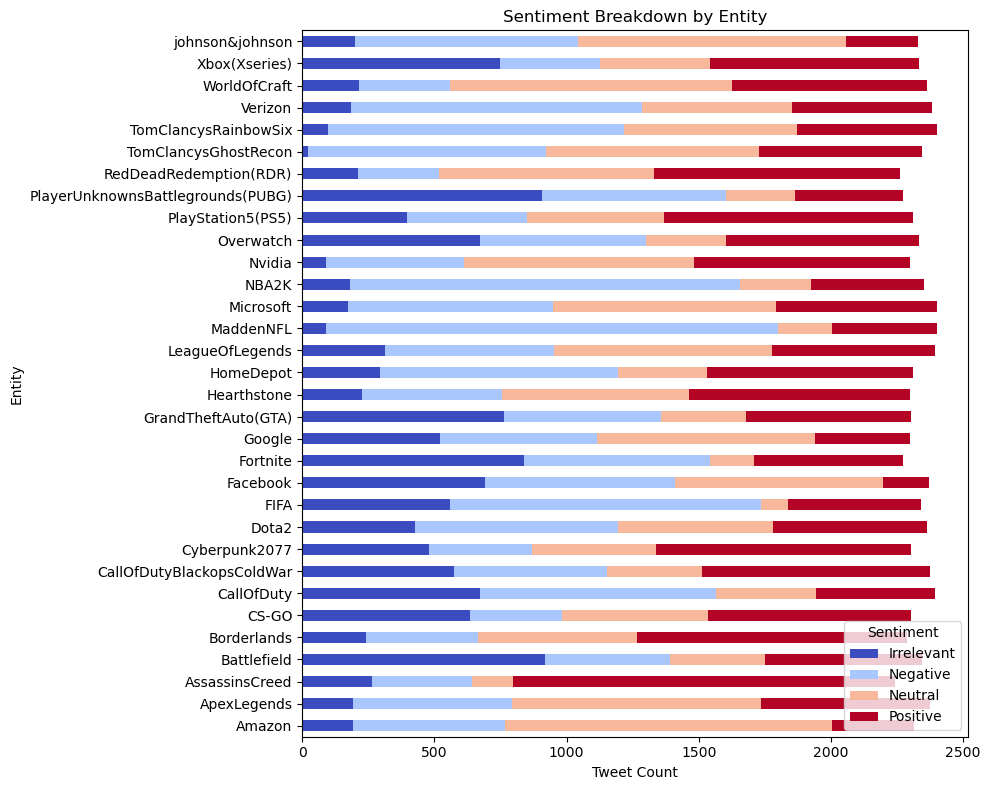

In [155]:
entity_sentiment = df.groupby('Entity')['Sentiment'].value_counts().unstack().fillna(0)
entity_sentiment.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='coolwarm')
plt.title('Sentiment Breakdown by Entity')
plt.xlabel('Tweet Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

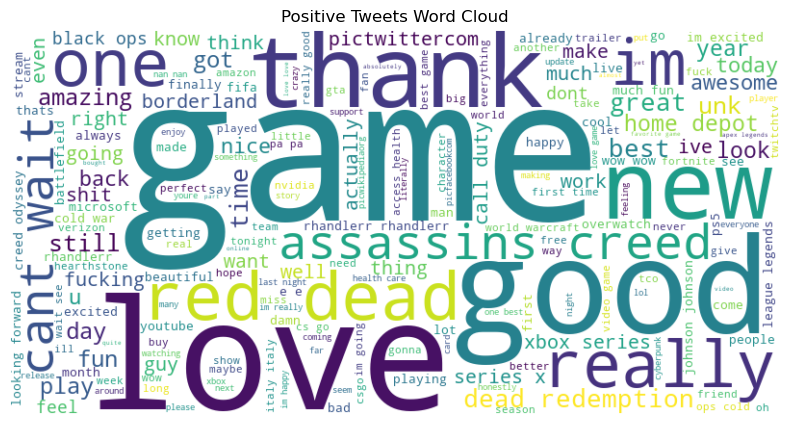

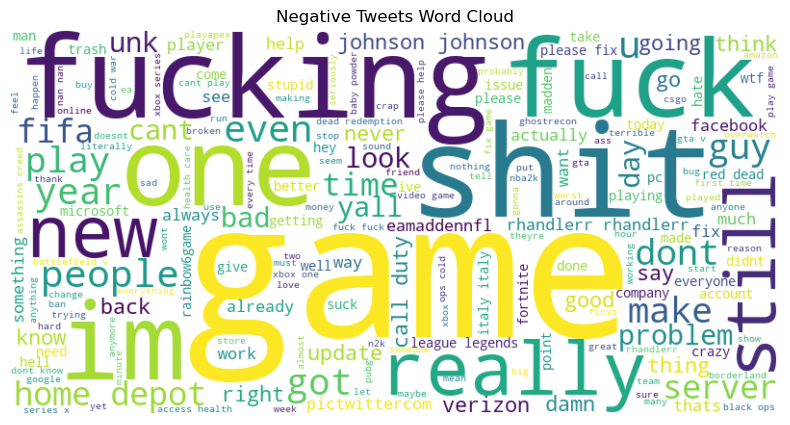

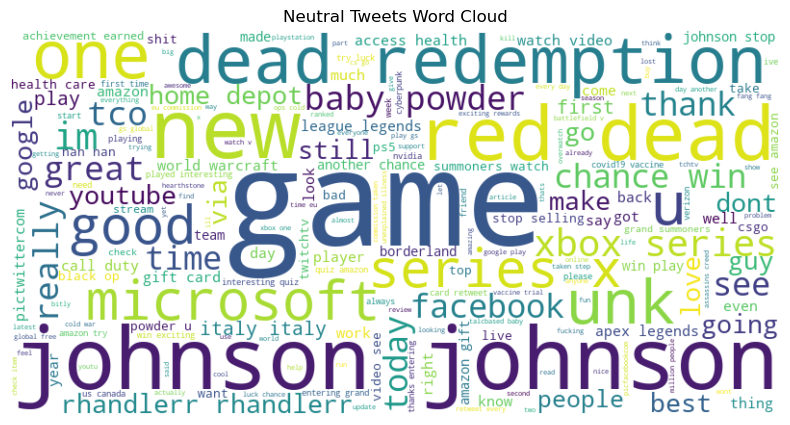

In [157]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['Sentiment'] == sentiment]['clean_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Tweets Word Cloud")
    plt.show()
     

sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['clean_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

def label(score):
    if score >= 0.05: return 'Positive'
    elif score <= -0.05: return 'Negative'
    else: return 'Neutral'

df['vader_sentiment'] = df['vader_score'].apply(label)
df[['clean_tweet', 'vader_score', 'vader_sentiment']].head()
     